# Competição do Dataset Adidas vs Nike (kaggle)

# Objetivo

# Introdução

# Desenvolvimento 

# Análise dos dados

In [1]:
import pandas as pd
import re
import seaborn as sns
import seaborn.objects as so
import matplotlib as plt
import numpy as np

In [2]:
dados = pd.read_csv('C:/Users/mauri/Desktop/Cursos Diversos/kaggle/AdidasNike/Data/AdidasVsNike.csv' , sep=',')

In [3]:
dados.head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15


----
Dimensão da base
- Base de possui 10 colunas e 3268 linhas.
----

In [4]:
print(dados.shape)

(3268, 10)


----
## Dicionário de dados 
- **Product Name**: Nome dos produtos
- **Product ID**: Código dos produtos 
- **Listing Price**: Preço tabelado dos produtos
- **Sale Price**: Preço de venda dos produtos
- **Discount**: Desconto aplicado ao produto
- **Brand**: Marca do produto
- **Description**: Descrição dos produtos vendidos
- **Rating**: Nota de avaliação do produto
- **Reviews**: Quantidade de visualização do produto
- **Last Visited**: Última data de visita
----


-------
Análise de dados faltantes
- Foram identificados apenas 3 informações nulas. Sendo a descrição de três produtos.
------

In [5]:
dados.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [6]:
dados[dados['Description'].isnull()]


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2780,Nike React Infinity Run Flyknit,CD4371-001,0,13995,0,Nike,NaN,4.6,68,2020-04-13T15:30:15
2888,Nike React Infinity Run Flyknit,CD4372-004,0,13995,0,Nike,NaN,4.2,29,2020-04-13T15:32:18
3133,Nike Free X Metcon 2,CD8526-446,0,9995,0,Nike,NaN,3.0,7,2020-04-13T15:36:37


In [7]:
dados[dados['Product Name']=='Nike React Infinity Run Flyknit']

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2780,Nike React Infinity Run Flyknit,CD4371-001,0,13995,0,Nike,NaN,4.6,68,2020-04-13T15:30:15
2888,Nike React Infinity Run Flyknit,CD4372-004,0,13995,0,Nike,NaN,4.2,29,2020-04-13T15:32:18


In [8]:
dados[dados['Product Name']=='Nike Free X Metcon 2']

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2822,Nike Free X Metcon 2,AQ8306-407,9995,7997,0,Nike,The Nike Free X Metcon will take you from a sh...,3.4,23,2020-04-13T15:30:25
3133,Nike Free X Metcon 2,CD8526-446,0,9995,0,Nike,NaN,3.0,7,2020-04-13T15:36:37


In [9]:
dados.groupby('Brand').agg({'Product ID': 'count'})

,Product ID
Brand,
Adidas Adidas ORIGINALS,1
Adidas CORE / NEO,1111
Adidas ORIGINALS,907
Adidas SPORT PERFORMANCE,606
Nike,643


In [10]:
dados[dados['Brand']=='Adidas Adidas ORIGINALS']

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14


In [11]:
dados[dados['Brand']=='Adidas ORIGINALS'].head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15


In [12]:
dados['Brand']= dados['Brand'].apply(lambda x : re.sub(r'Adidas Adidas', 'Adidas', x) )

In [13]:
dados.groupby('Brand').agg({'Product ID': 'count'})

,Product ID
Brand,
Adidas CORE / NEO,1111
Adidas ORIGINALS,908
Adidas SPORT PERFORMANCE,606
Nike,643


## Análise Exploratória de Dados 

------
Identificar os Big Number

------

In [14]:
dados.groupby('Brand').agg(
    Quant_Prod = ('Product ID','count'),
    Preco_Total = ('Listing Price','sum'),
    Total_Vendas = ('Sale Price','sum')
)

,Quant_Prod,Preco_Total,Total_Vendas
Brand,,,
Adidas CORE / NEO,1111,5501489,3462112
Adidas ORIGINALS,908,8916992,6185692
Adidas SPORT PERFORMANCE,606,5534094,3831582
Nike,643,2492115,6567394


<AxesSubplot:xlabel='Valores', ylabel='Brand'>

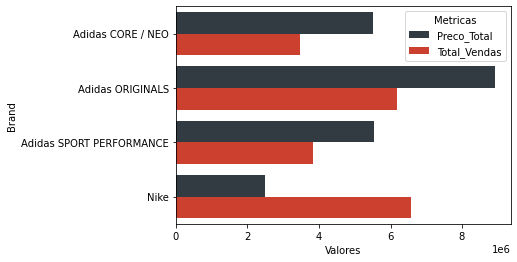

In [15]:
f1 = dados.groupby('Brand').agg(
    Quant_Prod = ('Product ID','count'),
    Preco_Total = ('Listing Price','sum'),
    Total_Vendas = ('Sale Price','sum')
    ).reset_index()

### transformado a base de dados
f1_long = f1.melt(id_vars= 'Brand', var_name='Metricas',value_vars=['Preco_Total','Total_Vendas' ],value_name='Valores')

#### Minha paleta de cores
minha_paleta=['#313B44', '#E62B15', '#8B4944', '#606467', '#AAABAD','#1C1D22']
sns.set_palette(minha_paleta)

### representação gráfica
sns.barplot(
    data=f1_long,
    x= 'Valores',
    y='Brand',
    hue='Metricas',)


-------
Podemos identificar um problema entre o valor dos produtos tabelados e o valor de venda.

- Existe uma diferença entre os valores tabeledos e os produtos vendidos pela empresa NIKE. 
- Podemos considerar que possivelmente os valores de descontos podem esta errados. Existe a necessidade de recalcular e comprar.
-----


In [16]:
dados.groupby('Brand').agg(
    Quant_Prod = ('Product ID','count'),
    Media_descontos = ('Discount','mean'),
    Media_avaliacoes = ('Rating','mean'),
    Quand_visualizacoes = ('Reviews','sum')
)

,Quant_Prod,Media_descontos,Media_avaliacoes,Quand_visualizacoes
Brand,,,,
Adidas CORE / NEO,1111,36.300630,3.412331,53556
Adidas ORIGINALS,908,31.134361,3.323568,44744
Adidas SPORT PERFORMANCE,606,31.732673,3.346205,29605
Nike,643,0.000000,2.734837,4618


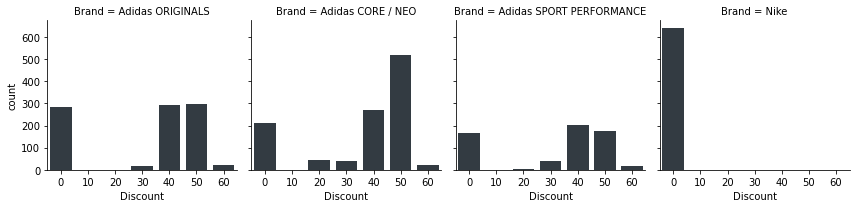

In [17]:
g = sns.FacetGrid(dados, col="Brand")  # Divide os gráficos
g.map(sns.countplot, "Discount",order=[0,10,20,30,40,50,60])

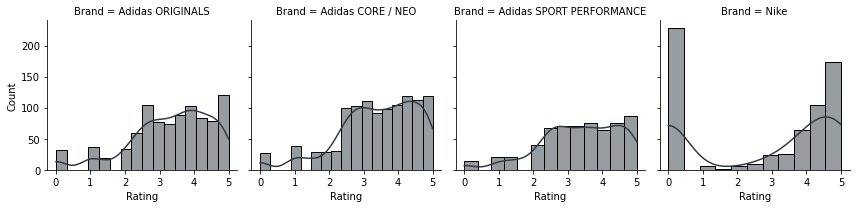

In [18]:
g = sns.FacetGrid(dados, col="Brand")  # Divide os gráficos
g.map(sns.histplot, "Rating", kde=True)  

### Conhecer a distruição do dados

<AxesSubplot:xlabel='Discount', ylabel='Count'>

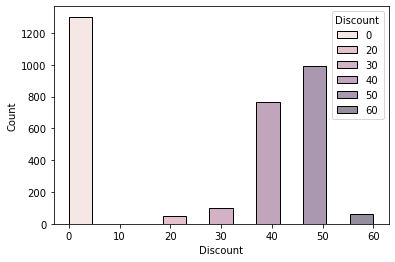

In [19]:
sns.histplot(
    data=dados,
    x='Discount',
    #kind='count'
    hue='Discount',
    kde= True ## função para adicionar a linha do histograma
)

In [20]:
dados.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited'],
      dtype='object')

In [21]:
dados['New_listing_price'] = [vendas if price <= vendas else price
                              for price, vendas in zip(dados['Listing Price'],dados['Sale Price'])]

In [22]:
dados[dados['Brand']=='Nike'].head(5)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,New_listing_price
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,2020-04-13T15:27:56,7495
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,2020-04-13T15:27:56,7495
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,2020-04-13T15:27:56,9995
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,2020-04-13T15:27:57,9995
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,2020-04-13T15:27:57,9995


In [23]:
dados['New_discount'] = [ (1-(preco/vendas))*100 for preco, vendas in zip(dados['Sale Price'], dados['New_listing_price'])]

In [24]:
dados.head(5)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,New_listing_price,New_discount
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,14999,50.003334
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,7599,50.006580
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,999,40.040040
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,6999,50.007144
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,7999,50.006251


In [25]:
dados['New_brand'] = [ 'Nike' if marca in 'Nike' else 'Adidas'  for marca in dados['Brand']]

In [26]:
dados.columns
col_numeric = ['Rating', 'Reviews', 'Last Visited','New_listing_price', 'Sale Price', 'New_discount', 'New_brand']

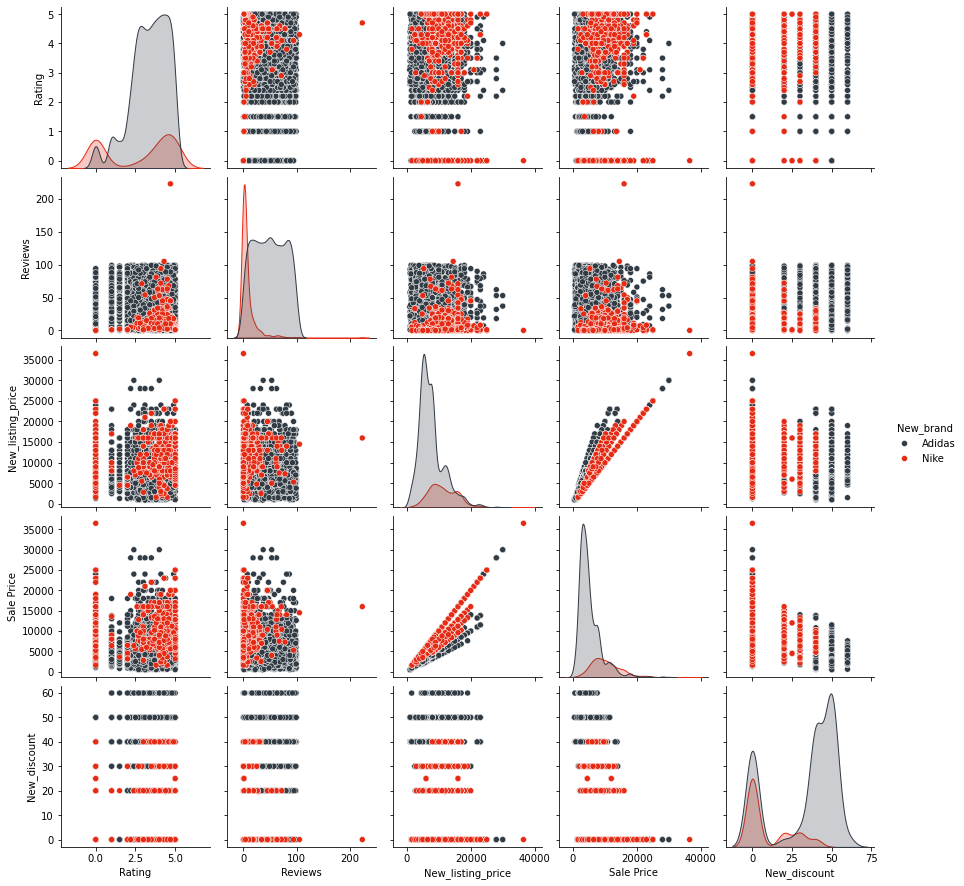

In [27]:
sns.pairplot(
    data= dados[col_numeric],
    hue = 'New_brand'
    )

# Analise de textos

O objetivo é extrair um padrão da descrição do nome dos produtos

## Padronização do texto

In [28]:
dados['Product Name'] = dados['Product Name'].apply(lambda nome: nome.upper() )

In [29]:
dados.head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,New_listing_price,New_discount,New_brand
0,WOMEN'S ADIDAS ORIGINALS NMD_RACER PRIMEKNIT S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,14999,50.003334,Adidas
1,WOMEN'S ADIDAS ORIGINALS SLEEK SHOES,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,7599,50.006580,Adidas
2,WOMEN'S ADIDAS SWIM PUKA SLIPPERS,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,999,40.040040,Adidas


In [30]:
dados['Product Name'] = dados['Product Name'].apply(lambda nome: re.sub(r"[^a-zA-Z0-9\s]",'', nome ))

In [31]:
dados.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,New_listing_price,New_discount,New_brand
0,WOMENS ADIDAS ORIGINALS NMDRACER PRIMEKNIT SHOES,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,14999,50.003334,Adidas
1,WOMENS ADIDAS ORIGINALS SLEEK SHOES,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,7599,50.006580,Adidas
2,WOMENS ADIDAS SWIM PUKA SLIPPERS,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,999,40.040040,Adidas
3,WOMENS ADIDAS SPORT INSPIRED QUESTAR RIDE SHOES,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,6999,50.007144,Adidas
4,WOMENS ADIDAS ORIGINALS TAEKWONDO SHOES,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,7999,50.006251,Adidas


------
Definindo os padrões a serem extraidos do nome dos produtos 

------

In [32]:
dados['Brand'].unique()

array(['Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

-----
São 4 marcas.  
Objetivo: pegar 10 exemplos aleatórios de cada marca para definir um padrão.

-----

In [33]:
### função para escolha aleatória de dados
import random as rd


In [34]:
lista1 = dados[dados['Brand']=='Adidas SPORT PERFORMANCE']['Product Name']
lista1

72                  MENS ADIDAS OUTDOOR ELEVATE SANDALS
84                    MENS ADIDAS RUNNING EDGE PR SHOES
87                   MENS ADIDAS OUTDOOR ANDORIAN SHOES
93           MENS ADIDAS RUNNING PUREBOUNCE CLIMA SHOES
102             MENS ADIDAS OUTDOOR TERRA LIGHT SANDALS
                             ...                       
2620               MENS ADIDAS ADIPOWER VECTOR 20 SHOES
2621                   MENS ADIDAS CRICKET HOWZAT SHOES
2622                        MENS CRICKET CRI HASE SHOES
2623    UNISEX ADIDAS OUTDOOR TERREX DAROGA WATER SHOES
2624          MENS ADIDAS BASKETBALL HARDEN VOL 4 SHOES
Name: Product Name, Length: 606, dtype: object

-----
Parece que para o nome dos produtos da Adidas Performance existe um padrão, composto por: 
- Gêneros do produto; 
- Marca do produto;
- Modelo do produto;
- Tipo de calçado. 

----

In [35]:
lista1 = lista1.sample(10)
lista1 = pd.DataFrame(lista1 )
lista1

,Product Name
1432,WOMENS ADIDAS RUNNING AEROBOUNCE 2 SHOES
1620,WOMENS TENNIS LACELESS HARD COURT SHOES
1183,MENS ADIDAS RUNNING PUREBOOST SHOES
2383,MENS ADIDAS FOOTBALL PREDATOR 193 FIRM GROUND ...
2363,MENS ADIDAS FOOTBALL X 183 FIRM GROUND BOOTS
1063,MENS ADIDAS FOOTBALL PREDATOR 193 INDOOR SHOES
1761,MENS ADIDAS OUTDOOR SPRY II SANDALS
1441,WOMENS ADIDAS RUNNING EDGEBOUNCE SHOES
1583,WOMENS ADIDAS OUTDOOR TERREX TRACEROCKER SHOES
2375,MENS PHARRELL WILLIAMS X ADIDAS RUNNING SOLAR ...


In [36]:
# Primeiro Padrao
pattern1 = r"(?P<genero>MENS|WOMENS)\s*(?P<marca>ADIDAS)?\s*(?P<modelo>[A-Z0-9\s]*)?\s(?P<Tipo>[A-Z00-9$]*)"
lista1['Product Name'].apply(lambda x: pd.Series(re.match(pattern1, x ).groupdict()))

,genero,marca,modelo,Tipo
1432,WOMENS,ADIDAS,RUNNING AEROBOUNCE 2,SHOES
1620,WOMENS,None,TENNIS LACELESS HARD COURT,SHOES
1183,MENS,ADIDAS,RUNNING PUREBOOST,SHOES
2383,MENS,ADIDAS,FOOTBALL PREDATOR 193 FIRM GROUND,CLEATS
2363,MENS,ADIDAS,FOOTBALL X 183 FIRM GROUND,BOOTS
1063,MENS,ADIDAS,FOOTBALL PREDATOR 193 INDOOR,SHOES
1761,MENS,ADIDAS,OUTDOOR SPRY II,SANDALS
1441,WOMENS,ADIDAS,RUNNING EDGEBOUNCE,SHOES
1583,WOMENS,ADIDAS,OUTDOOR TERREX TRACEROCKER,SHOES
2375,MENS,None,PHARRELL WILLIAMS X ADIDAS RUNNING SOLAR HU PRD,SHOES


In [43]:
lista2 = dados[dados['Brand']=='Adidas ORIGINALS']['Product Name']
lista2

0        WOMENS ADIDAS ORIGINALS NMDRACER PRIMEKNIT SHOES
1                     WOMENS ADIDAS ORIGINALS SLEEK SHOES
4                 WOMENS ADIDAS ORIGINALS TAEKWONDO SHOES
9                MENS ADIDAS ORIGINALS FOREST GROVE SHOES
10                WOMENS ADIDAS ORIGINALS SWIFT RUN SHOES
                              ...                        
2579               MENS ADIDAS ORIGINALS ZX 4000 4D SHOES
2581          MENS ORIGINALS ACTION SPORTS KIEL LOW SHOES
2588                   MENS ADIDAS ORIGINALS 3ST004 SHOES
2595               MENS ADIDAS ORIGINALS STAN SMITH SHOES
2616    MENS ADIDAS ORIGINALS BY ALEXANDER WANG ADILET...
Name: Product Name, Length: 908, dtype: object

In [47]:
lista2 = lista2.sample(10)
lista2 = pd.DataFrame(lista2)
lista2

,Product Name
517,WOMENS ADIDAS ORIGINALS FALCON 2000 SHOES
386,WOMENS ADIDAS ORIGINALS SAMBAROSE SHOES
1516,MENS ADIDAS ORIGINALS SAMBA RM SHOES
2449,MENS ADIDAS ORIGINALS EQT SUPPORT MID ADV PRIM...
2595,MENS ADIDAS ORIGINALS STAN SMITH SHOES
1272,WOMENS ADIDAS ORIGINALS FALCON SHOES
2465,MENS ADIDAS ORIGINALS SKATEBOARDING CITY CUP S...
2347,MENS ADIDAS ORIGINALS NIZZA SHOES
1352,MENS ADIDAS ORIGINALS SUPERSTAR SHOES
2324,MENS ADIDAS ORIGINALS KAMANDA BF SHOES


In [44]:
# Primeiro Padrao
pattern2 = r"(?P<genero>MENS|WOMENS)\s*(?P<marca>ADIDAS)?\s*(?P<modelo>[A-Z0-9\s]*)?\s(?P<Tipo>[A-Z00-9$]*)"


In [48]:
lista2['Product Name'].apply(lambda x: pd.Series(re.match(pattern2,x).groupdict()))

,genero,marca,modelo,Tipo
517,WOMENS,ADIDAS,ORIGINALS FALCON 2000,SHOES
386,WOMENS,ADIDAS,ORIGINALS SAMBAROSE,SHOES
1516,MENS,ADIDAS,ORIGINALS SAMBA RM,SHOES
2449,MENS,ADIDAS,ORIGINALS EQT SUPPORT MID ADV PRIMEKNIT,SHOES
2595,MENS,ADIDAS,ORIGINALS STAN SMITH,SHOES
1272,WOMENS,ADIDAS,ORIGINALS FALCON,SHOES
2465,MENS,ADIDAS,ORIGINALS SKATEBOARDING CITY CUP,SHOES
2347,MENS,ADIDAS,ORIGINALS NIZZA,SHOES
1352,MENS,ADIDAS,ORIGINALS SUPERSTAR,SHOES
2324,MENS,ADIDAS,ORIGINALS KAMANDA BF,SHOES


In [49]:
lista3 = dados[dados['Brand']=='Adidas CORE / NEO']['Product Name']
lista3 = lista3.sample(10)
lista3 = pd.DataFrame(lista3)
lista3

,Product Name
1862,MENS ADIDAS SPORT INSPIRED CLOUDFOAM ULTIMATE ...
1089,WOMENS ADIDAS RUNNING ENERGYFALCON X SHOES
1779,MENS ADIDAS SPORT INSPIRED GLARUS SHOES
446,MENS ADIDAS RUNNING KALUS 10 SHOES
379,WOMENS ADIDAS RUNNING SOORAJ SHOES
2084,MENS ADIDAS SPORT INSPIRED CLOUDFOAM RACER TR ...
350,MENS ADIDAS SPORT INSPIRED BLAZE RUNNER SHOES
342,MENS ADIDAS SPORT INSPIRED QUICKSPIKE SHOES
392,WOMENS ADIDAS SWIMMING EEZAY 2019 SLIPPERS
232,WOMENS ADIDAS SPORT INSPIRED QT RACER SHOES


In [50]:
# Primeiro Padrao
pattern3 = r"(?P<genero>MENS|WOMENS)\s*(?P<marca>ADIDAS)?\s*(?P<modelo>[A-Z0-9\s]*)?\s(?P<Tipo>[A-Z00-9$]*)"


In [51]:
lista3['Product Name'].apply(lambda x: pd.Series(re.match(pattern2,x).groupdict()))

,genero,marca,modelo,Tipo
1862,MENS,ADIDAS,SPORT INSPIRED CLOUDFOAM ULTIMATE,SHOES
1089,WOMENS,ADIDAS,RUNNING ENERGYFALCON X,SHOES
1779,MENS,ADIDAS,SPORT INSPIRED GLARUS,SHOES
446,MENS,ADIDAS,RUNNING KALUS 10,SHOES
379,WOMENS,ADIDAS,RUNNING SOORAJ,SHOES
2084,MENS,ADIDAS,SPORT INSPIRED CLOUDFOAM RACER TR,SHOES
350,MENS,ADIDAS,SPORT INSPIRED BLAZE RUNNER,SHOES
342,MENS,ADIDAS,SPORT INSPIRED QUICKSPIKE,SHOES
392,WOMENS,ADIDAS,SWIMMING EEZAY 2019,SLIPPERS
232,WOMENS,ADIDAS,SPORT INSPIRED QT RACER,SHOES


In [45]:
# Lista de dados da Nike

In [44]:
dados[dados['Brand']=='Nike']['Product Name']


2625           NIKE AIR FORCE 1 07 ESSENTIAL
2626                     NIKE AIR FORCE 1 07
2627            NIKE AIR FORCE 1 SAGE LOW LX
2628                     NIKE AIR MAX DIA SE
2629                     NIKE AIR MAX VERONA
                        ...                 
3263                      AIR JORDAN 8 RETRO
3264              NIKE PHANTOM VENOM CLUB IC
3265    NIKE MERCURIAL SUPERFLY 7 ACADEMY TF
3266                         NIKE AIR MAX 98
3267                           NIKE P6000 SE
Name: Product Name, Length: 643, dtype: object

In [55]:
lista4 = dados[dados['Brand']=='Nike']['Product Name']
lista4 = lista4.sample(10)
lista4 = pd.DataFrame(lista4)
lista4


,Product Name
2882,JORDAN MAX 200
2854,NIKE JOYRIDE DUAL RUN
2902,NIKE AIR MAX 720 HORIZON
2973,NIKE REACT METCON
3130,NIKE AIR MAX TAILWIND IV
2977,NIKE MERCURIAL VAPOR 13 ACADEMY MDS TF
3242,NIKE BLAZER LOW SUEDE
3053,NIKE AIR HUARACHE
2686,NIKE MERCURIAL VAPOR 13 ACADEMY NEYMAR JR TF
2765,PG 4 EP


In [70]:
pattern4 = r'(?P<Brand>NIKE|JORDAN|PG)\s(?P<Model>[\w\s-]+?)(?:\s+(?P<Version>\d+.*?))?(?:\s+(?P<Extra>TF|EP|NEYMAR JR|MDS))?$'


In [71]:
lista4['Product Name'].apply(lambda x: pd.Series(re.match(pattern4, x).groupdict() if re.match(pattern4, x) else {}))


,Brand,Model,Version,Extra
2882,JORDAN,MAX,200,None
2854,NIKE,JOYRIDE DUAL RUN,None,None
2902,NIKE,AIR MAX,720 HORIZON,None
2973,NIKE,REACT METCON,None,None
3130,NIKE,AIR MAX TAILWIND IV,None,None
2977,NIKE,MERCURIAL VAPOR,13 ACADEMY MDS,TF
3242,NIKE,BLAZER LOW SUEDE,None,None
3053,NIKE,AIR HUARACHE,None,None
2686,NIKE,MERCURIAL VAPOR,13 ACADEMY NEYMAR JR,TF
2765,PG,4,None,EP
